In [62]:
import pandas as pd
from pandasql import sqldf
import matplotlib.pyplot as plt

### reading the datasets

In [40]:
animes_df = pd.read_parquet('../datasets/anime/enhanced_data/prepared_animes.parquet')
genres_df = pd.read_parquet('../datasets/anime/enhanced_data/animes_genres.parquet')

### setup libs and frameworks

In [3]:
pd.set_option('display.max_columns', None)
pysqldf = lambda q: sqldf(q, globals())

### validating samples

In [4]:
animes_df.head(3)

,id,title,photo,synopsis,background,data_extraction,links.episodes,links.stats,links.characters & staff,details.Synonyms,details.Japanese,details.Type,details.Episodes,details.Status,details.Aired,details.Premiered,details.Broadcast,details.Producers,details.Licensors,details.Studios,details.Source,details.Genres,details.Duration,details.Rating,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites,details.English,links,aired_from,aired_to,days_in_air,hours_per_episode,minutes_per_episode,seconds_per_episode,episode_lenght_in_seconds,seconds_in_air
0,6604,Kuruneko,https://cdn.myanimelist.net/images/anime/6/205...,Based on a manga about cats and their sake lov...,No background information,2021-02-16 17:48:51,https://myanimelist.net/anime/6604/Kuruneko/ep...,https://myanimelist.net/anime/6604/Kuruneko/stats,https://myanimelist.net/anime/6604/Kuruneko/ch...,Kuru Neko,くるねこ,TV,50.0,Finished Airing,"Jul 5, 2009 to Jun 26, 2010",Summer 2009,Saturdays at 11:40 (JST),"['Kadokawa Pictures Japan', 'Kansai Telecastin...",None,"['Studio Deen', 'DAX Production']",Manga,"[Comedy, Slice of Life]",2 min. per ep.,G - All Ages,7.31,706,2308,7070,4030,9,None,NaN,2009-07-05,2010-06-26,356.0,0,2,0,120,6000.0
1,6607,Superflat First Love,https://cdn.myanimelist.net/images/anime/7/222...,6 years after she was swallowed by the Panda G...,No background information,2021-02-16 17:48:54,None,https://myanimelist.net/anime/6607/Superflat_F...,https://myanimelist.net/anime/6607/Superflat_F...,None,すーぱーふらっと・ファーストラブ,Special,1.0,Finished Airing,"Apr 28, 2009",None,None,None,None,None,Unknown,"[Adventure, Fantasy]",3 min.,G - All Ages,5.67,1945,9226,7644,3212,1,None,NaN,2009-04-28,2009-04-28,0.0,0,3,0,180,180.0
2,6609,Pucca,https://cdn.myanimelist.net/images/anime/3/151...,Pucca is the young daughter of a Chinese noodl...,No background information,2021-02-16 17:48:55,https://myanimelist.net/anime/6609/Pucca/episode,https://myanimelist.net/anime/6609/Pucca/stats,https://myanimelist.net/anime/6609/Pucca/chara...,Jjajang Sonyeo Ppukka,짜장소녀 뿌까,TV,26.0,Finished Airing,"Sep 8, 2006 to May 11, 2007",Fall 2006,Unknown,None,None,None,Unknown,"[Comedy, Parody, Romance]",23 min. per ep.,G - All Ages,6.56,5996,5582,4673,11369,17,None,NaN,2006-09-08,2007-05-11,245.0,0,23,0,1380,35880.0


In [5]:
genres_df.head(3)

,id,details.Genres,Cars,Demons,Action,Horror,Samurai,Harem,Kids,Shoujo,Police,Fantasy,Space,Shoujo Ai,Game,Mecha,Yuri,Magic,Josei,School,Sports,Supernatural,Hentai,Adventure,Slice of Life,Parody,Military,Ecchi,Drama,Sci-Fi,Super Power,Comedy,Seinen,Mystery,Shounen,Dementia,Yaoi,Vampire,Historical,Psychological,Thriller,Martial Arts,Shounen Ai,Romance,Music
0,6604,"[Comedy, Slice of Life]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,6607,"[Adventure, Fantasy]",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6609,"[Comedy, Parody, Romance]",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [6]:
genre = 'Seinen'
query = f"""
SELECT a.id, title, Shounen
FROM animes_df A
JOIN genres_df B
ON A.id = B.id
WHERE [{genre}] = 1
"""

filtered_genre_df = pysqldf(query)
print(f'Number of "{genre}" animes: {len(filtered_genre_df.index)}')

Number of "Seinen" animes: 885


In [7]:
query = """
SELECT a.id, title, [details.Score],
        [details.ScoredBy], [details.Ranked], [details.Popularity],
        [details.Members], [details.Favorites]
FROM animes_df A
JOIN genres_df B
ON A.id = B.id
WHERE [details.Ranked] <> 0
AND Shounen = 1
ORDER BY [details.Ranked] ASC
"""

ordered_df_by_ranked = pysqldf(query)
ordered_df_by_ranked.head(50)

,id,title,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites
0,5114,Fullmetal Alchemist: Brotherhood,9.19,1361201,1,3,2240349,183357
1,40028,Shingeki no Kyojin: The Final Season,9.17,280398,2,121,726462,44422
2,38524,Shingeki no Kyojin Season 3 Part 2,9.11,719742,4,63,1078146,41117
3,28977,Gintama°,9.10,142531,5,328,405052,11889
4,11061,Hunter x Hunter (2011),9.10,967019,6,12,1678388,147611
5,9969,Gintama',9.07,153276,8,362,367379,6602
6,15417,Gintama': Enchousen,9.04,110489,9,658,222303,2583
7,28851,Koe no Katachi,9.00,923241,11,28,1379175,62120
8,34096,Gintama.,8.99,89389,12,724,202223,2404
9,918,Gintama,8.96,227393,14,114,756268,48328


In [8]:
query = """
SELECT a.id, title, [details.Score],
        [details.ScoredBy], [details.Ranked], [details.Popularity],
        [details.Members], [details.Favorites]
FROM animes_df A
JOIN genres_df B
ON A.id = B.id
WHERE [details.Popularity] <> 0
AND Shounen = 1
ORDER BY [details.Popularity] ASC
"""

ordered_df_by_popularity = pysqldf(query)
ordered_df_by_popularity.head(50)
# print(ordered_df_by_popularity.info())

,id,title,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites
0,1535,Death Note,8.63,1766128,60,1,2587361,145074
1,16498,Shingeki no Kyojin,8.48,1737623,115,2,2524382,129384
2,5114,Fullmetal Alchemist: Brotherhood,9.19,1361201,1,3,2240349,183357
3,31964,Boku no Hero Academia,8.10,1292460,408,6,1925938,50352
4,20,Naruto,7.91,1196843,658,8,1839112,65872
5,11061,Hunter x Hunter (2011),9.10,967019,6,12,1678388,147611
6,33486,Boku no Hero Academia 2nd Season,8.33,1082319,198,13,1618236,18964
7,25777,Shingeki no Kyojin Season 2,8.45,1022352,128,16,1586520,18205
8,20507,Noragami,8.01,901382,524,18,1534161,29224
9,1735,Naruto: Shippuuden,8.16,856871,346,19,1537885,84222


In [9]:
query = """
SELECT [details.Rating] as Rating, COUNT([details.Rating]) as Count
FROM animes_df
GROUP BY [details.Rating]
ORDER BY 2 DESC
"""

counts_per_rating = pysqldf(query)
counts_per_rating

,Rating,Count
0,PG-13 - Teens 13 or older,6308
1,G - All Ages,6200
2,PG - Children,4585
3,Rx - Hentai,1346
4,R - 17+ (violence & profanity),1176
5,None,1138
6,R+ - Mild Nudity,1002


In [10]:
query = """
SELECT a.id, title, [details.Score],
        [details.ScoredBy], [details.Ranked], [details.Popularity],
        [details.Members], [details.Favorites]
FROM animes_df A
JOIN genres_df B
ON A.id = B.id
WHERE Shounen = 1
ORDER BY [details.Score] DESC
"""

ordered_df_by_score = pysqldf(query)
ordered_df_by_score.head(50)

,id,title,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites
0,5114,Fullmetal Alchemist: Brotherhood,9.19,1361201,1,3,2240349,183357
1,40028,Shingeki no Kyojin: The Final Season,9.17,280398,2,121,726462,44422
2,38524,Shingeki no Kyojin Season 3 Part 2,9.11,719742,4,63,1078146,41117
3,11061,Hunter x Hunter (2011),9.10,967019,6,12,1678388,147611
4,28977,Gintama°,9.10,142531,5,328,405052,11889
5,9969,Gintama',9.07,153276,8,362,367379,6602
6,15417,Gintama': Enchousen,9.04,110489,9,658,222303,2583
7,28851,Koe no Katachi,9.00,923241,11,28,1379175,62120
8,34096,Gintama.,8.99,89389,12,724,202223,2404
9,918,Gintama,8.96,227393,14,114,756268,48328


In [11]:
query = """
SELECT [details.Type],count(id)
FROM animes_df
GROUP BY [details.Type]
"""

pysqldf(query)

,details.Type,count(id)
0,None,1719
1,Movie,3799
2,ONA,2464
3,OVA,3925
4,Special,2351
5,TV,7497


In [12]:
animes_df['aired_from'] = pd.to_datetime(animes_df['aired_from'])
animes_df['aired_to'] = pd.to_datetime(animes_df['aired_to'])

animes_df.sort_values('aired_from',ascending=True)

,id,title,photo,synopsis,background,data_extraction,links.episodes,links.stats,links.characters & staff,details.Synonyms,details.Japanese,details.Type,details.Episodes,details.Status,details.Aired,details.Premiered,details.Broadcast,details.Producers,details.Licensors,details.Studios,details.Source,details.Genres,details.Duration,details.Rating,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites,details.English,links,aired_from,aired_to,days_in_air,hours_per_episode,minutes_per_episode,seconds_per_episode,episode_lenght_in_seconds,seconds_in_air
2763,23651,Hanawa Hekonai Kappa Matsuri,None,No synopsis information has been added to this...,No background information,2021-02-16 16:21:15,None,https://myanimelist.net/anime/23651/Hanawa_Hek...,https://myanimelist.net/anime/23651/Hanawa_Hek...,None,塙凹内かっぱまつり,Movie,1.0,Finished Airing,1917,None,None,None,None,None,Unknown,"[Kids, Comedy]",Unknown,G - All Ages,0.00,0,14270,14363,233,0,None,NaN,1917-01-01,1917-01-01,0.0,0,0,0,0,0.0
20417,23189,Dekobou Shingachou: Meian no Shippai,https://cdn.myanimelist.net/images/anime/1124/...,No synopsis information has been added to this...,No background information,2021-02-16 16:11:52,None,https://myanimelist.net/anime/23189/Dekobou_Sh...,https://myanimelist.net/anime/23189/Dekobou_Sh...,Dekobou's New Picture Book: Failure of a Great...,凸坊新画帳 名案の失敗,Movie,1.0,Finished Airing,"Feb, 1917",None,None,None,None,None,Original,[Comedy],5 min.,G - All Ages,5.66,234,9255,11299,703,6,None,NaN,1917-02-01,1917-02-01,0.0,0,5,0,300,300.0
20416,23187,Chamebou Shin Gachou: Nomi Fuufu Shikaeshi no ...,None,No synopsis information has been added to this...,No background information,2021-02-16 16:11:50,None,https://myanimelist.net/anime/23187/Chamebou_S...,https://myanimelist.net/anime/23187/Chamebou_S...,None,茶目坊新画帳 蚤夫婦仕返しの巻,Movie,1.0,Finished Airing,"Apr 28, 1917",None,None,None,None,None,Original,[Comedy],Unknown,G - All Ages,0.00,0,13565,13596,291,0,None,NaN,1917-04-28,1917-04-28,0.0,0,0,0,0,0.0
20141,24577,Imokawa Mukuzo: Chuugaeri no Maki,https://cdn.myanimelist.net/images/anime/1795/...,It is most likely a story about a Mukuzo Imoka...,No background information,2021-02-16 16:41:58,None,https://myanimelist.net/anime/24577/Imokawa_Mu...,https://myanimelist.net/anime/24577/Imokawa_Mu...,"Imokawa Mukuzo: Somersault, The Somersault of ...",芋川椋三宙返りの巻,Movie,1.0,Finished Airing,"May, 1917",None,None,None,None,None,Original,[Comedy],5 min.,G - All Ages,0.00,0,14599,13152,334,0,None,NaN,1917-05-01,1917-05-01,0.0,0,5,0,300,300.0
20140,24575,Yume no Jidousha,None,It is most likely a story about a great dream ...,No background information,2021-02-16 16:41:56,None,https://myanimelist.net/anime/24575/Yume_no_Ji...,https://myanimelist.net/anime/24575/Yume_no_Ji...,"Dream Car, The Dream Car, Yume no Jidosha",夢の自動車,Movie,1.0,Finished Airing,"May, 1917",None,None,['Nikkatsu Mukojima'],None,None,Original,[Cars],Unknown,G - All Ages,0.00,0,13054,13274,322,0,None,NaN,1917-05-01,1917-05-01,0.0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21630,42068,Utau Soccer Panda Mifanda,https://cdn.myanimelist.net/images/anime/1296/...,Short anime based on Mifanda from MIFA (Music ...,No background information,2021-02-16 22:49:17,https://myanimelist.net/anime/42068/Utau_Socce...,https://myanimelist.net/anime/42068/Utau_Socce...,https://myanimelist.net/anime/42068/Utau_Socce...,None,歌うサッカーパンダ ミファンダ,TV,NaN,Not yet aired,Not available,None,Unknown,None,None,None,Other,"[Music, Slice of Life]",Unknown,G - All Ages,0.00,0,0,16958,86,0,None,NaN,NaT,NaT,NaN,0,0,0,0,NaN
21632,42071,Yuuki Yuuna wa Yuusha de Aru Churutto!,https://cdn.myanimelist.net/images/anime/1827/...,"Set in year 300 of the Era of the Gods, heroes...",No background information,2021-02-16 22:49:20,https://myanimelist.net/anime/42071/Yuuki_Yuun...,https://myanim

In [13]:
joined_df = animes_df.join(genres_df, on='id', lsuffix='_anime', rsuffix='_anime_genre')
joined_df = joined_df[joined_df['Shounen']==1]
joined_df

,id_anime,title,photo,synopsis,background,data_extraction,links.episodes,links.stats,links.characters & staff,details.Synonyms,details.Japanese,details.Type,details.Episodes,details.Status,details.Aired,details.Premiered,details.Broadcast,details.Producers,details.Licensors,details.Studios,details.Source,details.Genres_anime,details.Duration,details.Rating,details.Score,details.ScoredBy,details.Ranked,details.Popularity,details.Members,details.Favorites,details.English,links,aired_from,aired_to,days_in_air,hours_per_episode,minutes_per_episode,seconds_per_episode,episode_lenght_in_seconds,seconds_in_air,id_anime_genre,details.Genres_anime_genre,Cars,Demons,Action,Horror,Samurai,Harem,Kids,Shoujo,Police,Fantasy,Space,Shoujo Ai,Game,Mecha,Yuri,Magic,Josei,School,Sports,Supernatural,Hentai,Adventure,Slice of Life,Parody,Military,Ecchi,Drama,Sci-Fi,Super Power,Comedy,Seinen,Mystery,Shounen,Dementia,Yaoi,Vampire,Historical,Psychological,Thriller,Martial Arts,Shounen Ai,Romance,Music
33,6685,Mesu Kyoushi: Injoku no Kyoushitsu,https://cdn.myanimelist.net/images/anime/6/154...,Based on the adult game by Bishop. Toudou Miyu...,No background information,2021-02-16 17:50:15,https://myanimelist.net/anime/6685/Mesu_Kyoush...,https://myanimelist.net/anime/6685/Mesu_Kyoush...,https://myanimelist.net/anime/6685/Mesu_Kyoush...,Mesu Kyoshi Injoku no Kyoshitu,牝教師 淫辱の教室,OVA,3.0,Finished Airing,"Jun 25, 2009 to May 21, 2010",None,None,"['Milky Animation Label', 'MS Pictures', 'Anim...",None,None,Visual novel,[Hentai],30 min. per ep.,Rx - Hentai,6.31,1351,0,6759,4502,10,None,NaN,2009-06-25,2010-05-21,330.0,0,30,0,1800,5400.0,46652.0,"[Action, Adventure, Comedy, Shounen]",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
54,10715,Towa no Quon 4: Guren no Shoushin,https://cdn.myanimelist.net/images/anime/11/33...,The story follows a boy named Quon and others ...,No background information,2021-02-16 15:25:57,None,https://myanimelist.net/anime/10715/Towa_no_Qu...,https://myanimelist.net/anime/10715/Towa_no_Qu...,None,トワノクオン 第４章 紅蓮の焦心,Movie,1.0,Finished Airing,"Sep 10, 2011",None,None,"['Bandai Visual', 'Lantis', 'Movic', 'Showgate...",[Sentai Filmworks],['Bones'],Original,"[Action, Sci-Fi, Super Power, Supernatural]",48 min.,PG-13 - Teens 13 or older,7.60,16196,1279,2976,30087,13,Towanoquon: The Roaring Anxiety,NaN,2011-09-10,2011-09-10,0.0,0,48,0,2880,2880.0,28755.0,"[Action, Comedy, Martial Arts, Shounen, Super ...",0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
58,10719,Boku wa Tomodachi ga Sukunai,https://cdn.myanimelist.net/images/anime/8/328...,When Kodaka Hasegawa finds out that he will be...,"In 2012, Boku wa Tomodachi ga Sukunai Portable...",2021-02-16 15:26:01,https://myanimelist.net/anime/10719/Boku_wa_To...,https://myanimelist.net/anime/10719/Boku_wa_To...,https://myanimelist.net/anime/10719/Boku_wa_To...,I Don't Have Many Friends,僕は友達が少ない,TV,12.0,Finished Airing,"Oct 7, 2011 to Dec 23, 2011",Fall 2011,Fridays at 01:55 (JST),"['AIC', 'Media Factory', 'TBS', 'Bushiroad', '...",[Funimation],['AIC Build'],Light novel,"[Ecchi, Slice of Life, Comedy, Harem, Romance,...",24 min. per ep.,R+ - Mild Nudity,7.27,358962,2489,157,638989,3785,Haganai: I don't have many friends,NaN,2011-10-07,2011-12-23,77.0,0,24,0,1440,17280.0,28771.0,"[Game, Adventure, Shounen]",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,18617,Girls & Panzer Movie,https://cdn.myanimelist.net/images/anime/1776/...,Having won the 63rd National Sensha-dou tourna...,"Winner of the 2016 ""Sanctuary"" Award at the Ja...",2021-02-16 18:35:14,None,https://myanimelist.net/anime/18617/Girls___Pa...,https://myanimelist.net/a

In [14]:
query = """
SELECT a.id,b.id,Shounen
FROM animes_df A
JOIN genres_df B
ON A.id = B.id
WHERE Shounen = 1
"""

count_genre = pysqldf(query)
count_genre
# print(ordered_df_by_popularity.info())

,id,id,Shounen
0,10703,10703,1
1,10731,10731,1
2,10732,10732,1
3,10765,10765,1
4,10766,10766,1
...,...,...,...
1999,11266,11266,1
2000,11281,11281,1
2001,11299,11299,1
2002,7559,7559,1


In [79]:
type_df = animes_df[['details.Type','id']]\
                    .groupby('details.Type',as_index=False)\
                    .agg('count')\
                    .rename({'details.Type': 'Type'})
type_df.head(5)

,details.Type,id
0,Movie,3799
1,ONA,2464
2,OVA,3925
3,Special,2351
4,TV,7497


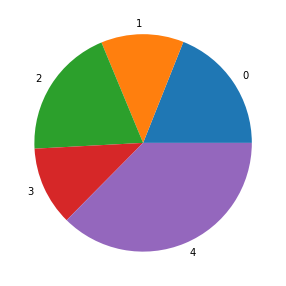

In [80]:
plot = type_df.plot.pie(x='Type', y='id', ylabel='', figsize=(5, 5), legend=False)

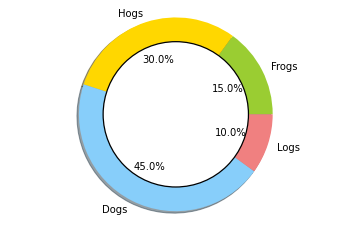

In [63]:
# The slices will be ordered and plotted counter-clockwise.
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0, 0, 0)  # explode a slice if required

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [83]:
print(type_df['details.Type'].values)

['Movie' 'ONA' 'OVA' 'Special' 'TV']


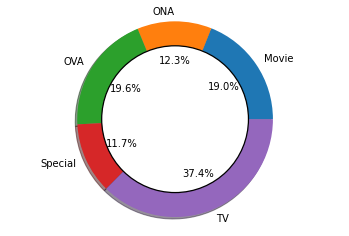

In [97]:
labels = type_df['details.Type'].values
sizes = type_df['id'].values
explode = (0, 0, 0, 0, 0)

plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True)
        
#draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.75,color='black', fc='white',linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)


# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.show()

In [119]:
filtered_genre_df = genres_df[genres_df['Shounen']==1]
genre_agg_df = filtered_genre_df[['Shounen','id']]\
                    .groupby('Shounen', as_index=False)\
                    .agg('count')
genre_agg_df

,Shounen,id
0,1,2004


In [118]:
import json
from os import listdir
from os.path import isfile, join

def concatened_json_files(path):
    directory_path = path
    concatenated_file = []
    file_counter = 0

    file_list = [f for f in listdir(directory_path) if isfile(join(directory_path, f))]

    for file in file_list:
        file_counter+=1
        with open(f'{directory_path}{file}') as f:
            for obj in json.load(f):
                concatenated_file.append(obj)

    return concatenated_file

animes_list = concatened_json_files('../datasets/anime/raw_data/')
result_list = []
for obj in animes_list:
    for value in obj['details']['Genres']:
        result_list.append(value)
genres_list = list(set(result_list))
print(genres_list)

['Mystery', 'Psychological', 'Parody', 'Yuri', 'Fantasy', 'Comedy', 'Harem', 'Police', 'Space', 'Samurai', 'Cars', 'Game', 'Vampire', 'Thriller', 'Hentai', 'Magic', 'Historical', 'Seinen', 'Romance', 'Shoujo', 'Sci-Fi', 'Adventure', 'Action', 'Ecchi', 'Music', 'Josei', 'School', 'Drama', 'Yaoi', 'Dementia', 'Shounen', 'Shoujo Ai', 'Military', 'Kids', 'Mecha', 'Shounen Ai', 'Supernatural', 'Super Power', 'Horror', 'Slice of Life', 'Sports', 'Demons', 'Martial Arts']


In [122]:
genres_labels = []
genres_sizes = []

for genre in genres_list:
    filtered_genre_df = genres_df[genres_df[genre]==1]
    genre_agg_df = filtered_genre_df[[genre,'id']]\
                        .groupby(genre, as_index=False)\
                        .agg('count')
    genres_labels.append(genre)
    genres_sizes.append(genre_agg_df['id'].values[0])

print(genres_labels)
print(genres_sizes)

['Mystery', 'Psychological', 'Parody', 'Yuri', 'Fantasy', 'Comedy', 'Harem', 'Police', 'Space', 'Samurai', 'Cars', 'Game', 'Vampire', 'Thriller', 'Hentai', 'Magic', 'Historical', 'Seinen', 'Romance', 'Shoujo', 'Sci-Fi', 'Adventure', 'Action', 'Ecchi', 'Music', 'Josei', 'School', 'Drama', 'Yaoi', 'Dementia', 'Shounen', 'Shoujo Ai', 'Military', 'Kids', 'Mecha', 'Shounen Ai', 'Supernatural', 'Super Power', 'Horror', 'Slice of Life', 'Sports', 'Demons', 'Martial Arts']
[795, 353, 661, 31, 4385, 6453, 400, 256, 500, 206, 147, 405, 146, 192, 1349, 1162, 1651, 885, 2010, 748, 2626, 4203, 4126, 822, 2527, 109, 1702, 2717, 47, 522, 2004, 83, 619, 5026, 1129, 106, 1560, 642, 493, 2026, 785, 510, 456]


In [135]:
import numpy as np

genres_labels = []
genres_sizes = []

joined_df = pd.merge(animes_df, genres_df, on='id')

for genre in genres_list:
    filtered_genre_df = joined_df[joined_df[genre]==1]
    genre_agg_df = filtered_genre_df[[genre,'id']]\
                        .groupby(genre, as_index=False)\
                        .agg('count')
    print(genre_agg_df.head(5))
    genres_labels.append(genre)
    genres_sizes.append(genre_agg_df['id'].values[0])

# genres_dict = {'Genres': genres_labels, 'Count': genres_sizes}  
    
# genre_agg_df = pd.DataFrame(genres_dict)
# genre_agg_df

   Mystery   id
0        1  795
   Psychological   id
0              1  353
   Parody   id
0       1  661
   Yuri  id
0     1  31
   Fantasy    id
0        1  4385
   Comedy    id
0       1  6453
   Harem   id
0      1  400
   Police   id
0       1  256
   Space   id
0      1  500
   Samurai   id
0        1  206
   Cars   id
0     1  147
   Game   id
0     1  405
   Vampire   id
0        1  146
   Thriller   id
0         1  192
   Hentai    id
0       1  1349
   Magic    id
0      1  1162
   Historical    id
0           1  1651
   Seinen   id
0       1  885
   Romance    id
0        1  2010
   Shoujo   id
0       1  748
   Sci-Fi    id
0       1  2626
   Adventure    id
0          1  4203
   Action    id
0       1  4126
   Ecchi   id
0      1  822
   Music    id
0      1  2527
   Josei   id
0      1  109
   School    id
0       1  1702
   Drama    id
0      1  2717
   Yaoi  id
0     1  47
   Dementia   id
0         1  522
   Shounen    id
0        1  2004
   Shoujo Ai  id
0          1 